In [40]:
#LSTM for Tesla stock prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [50]:
stock_df = pd.read_csv('TSLA.csv')
stock = stock_df['Close'].values.reshape(-1, 1)
dates = pd.to_datetime(stock_df['Date'])
stock.shape
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [61]:

sc = MinMaxScaler(feature_range=(0,1))
stock = sc.fit_transform(stock)

#selecting length for LSTM
sequence_length = 10
X, y = [], []

for i in range(len(stock) - sequence_length):
  X.append(stock[i: i+sequence_length, 0])
  y.append(stock[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates[sequence_length:], test_size = 0.2)

model = Sequential()
model.add(LSTM(units = 20, return_sequences=True, input_shape = (X.shape[1], 1)))
model.add(LSTM(units = 20, return_sequences = False))
model.add(Dense(units = 1))

In [77]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 2, batch_size = 50)

loss = model.evaluate(X_test, y_test)
print("loss = ",  loss)

Epoch 1/2
48/48 [==============================] - 7s 12ms/step - loss: 3.9725e-04
Epoch 2/2
19/19 [==============================] - 1s 5ms/step - loss: 3.3376e-04
loss =  0.0003337602538522333


19/19 [==============================] - 1s 6ms/step


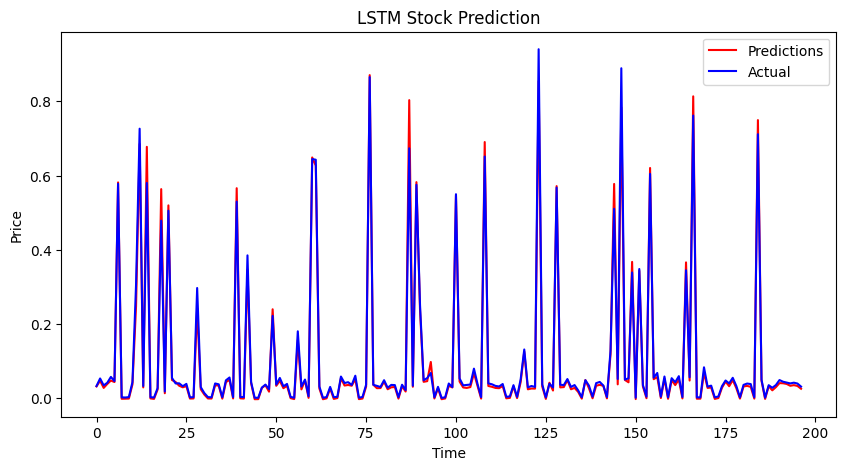

In [78]:
y_predict = model.predict(X_test)
y_predict_inverse = sc.inverse_transform(y_predict)
y_test_inverse = sc.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(y_predict_inverse[::3], color = "red",  label = "Predictions")
plt.plot(y_test[::3], color= "blue", label = "Actual")
plt.title('LSTM Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [79]:
train_loss = model.evaluate(X_train, y_train)
print("Train loss = ",  train_loss)

74/74 [==============================] - 1s 5ms/step - loss: 3.3502e-04
Train loss =  0.00033502178848721087


74/74 [==============================] - 0s 6ms/step


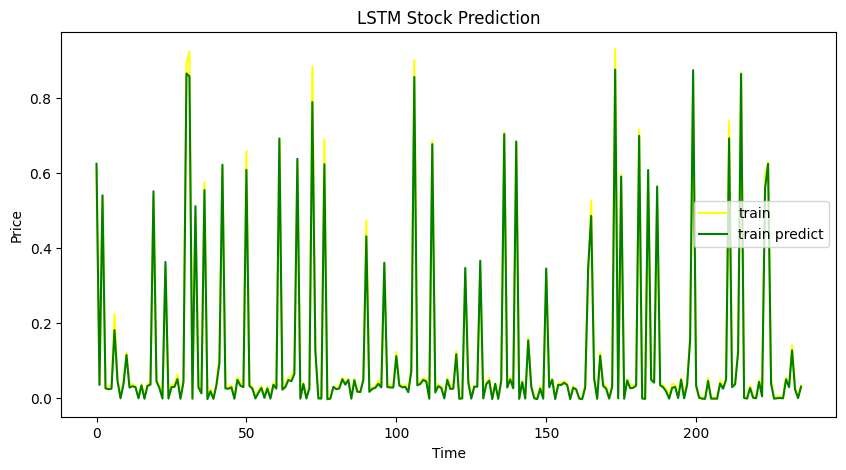

In [80]:
y_train_predict = model.predict(X_train)
y_train = sc.inverse_transform(y_train.reshape(-1, 1))
y_train_predict = sc.inverse_transform(y_train_predict)

plt.figure(figsize=(10, 5))
plt.plot(y_train[::10], color = "yellow", label = "train")
plt.plot(y_train_predict[::10], color = "green", label = "train predict")
plt.title('LSTM Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()